# Statistics and Probability
## First Block

We have the following p.d.f. $\frac{d\Gamma}{d\cos\theta}$ with a parameter $P_{\mu} \in [-1,1]$

$$
\frac{d\Gamma}{d\cos\theta}=\frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big)
$$

The variable $\theta$ represents the angle between the muon and electron polarizations, thus $\theta \in [-\pi,0]$ which means that $\cos \theta \in [-1,1]$. It can be checked that this function fulfills all the conditions in order to be a p.d.f.

#### 1. Positive Semi-Defined function
Both $P_{\mu}$ and $\cos \theta$ are constrained in the interval $[-1,1]$. Therefore:

\begin{eqnarray}
\frac{1}{2}\big(1-\frac{1}{3}\big) \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{1}{2}\big(1-\frac{-1}{3}\big) \\
\frac{1}{3} \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{2}{3}
\end{eqnarray}


#### 2. Normalized 
In order to simplify the calculations, we will use $\cos \theta$ as our variable. 

\begin{eqnarray}
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) d\cos\theta = \frac{1}{2}\int_{-1}^{1} d\cos\theta -\frac{1}{6}P_{\mu}\int_{-1}^{1} \cos\theta d\cos\theta = \Big[\frac{1}{2}\cos\theta-\frac{1}{6}P_{\mu}\cos^2\theta \Big]_{-1}^{1}=\frac{1}{2}(1-(-1))-\frac{1}{6}P_{\mu}(1-(-1)^2)=1
\end{eqnarray}


In [24]:
#Import useful python libraries 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

#Set diferent parameters for plots
SIZE=18
plt.rc('font', size=SIZE) #controls default text sizes
plt.rc('axes', titlesize=SIZE) #fontsize of the axes title
plt.rc('axes', labelsize=SIZE) #fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE) #fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE) #fontsize of the tick labels
plt.rc('legend', fontsize=SIZE) #legend fontsize
plt.rc('figure', titlesize=SIZE) #size of the figure title
plt.rc('figure', figsize=(12,8)) #size of the figure
plt.rc('lines', color='k')
plt.rc('axes', prop_cycle=plt.cycler(color=['k','g','r','b','c','m','y']))

In [22]:
# Define functions 
def gamma(cost,Pmu):
    dg=.5*(1-Pmu*cost/3)
    return dg

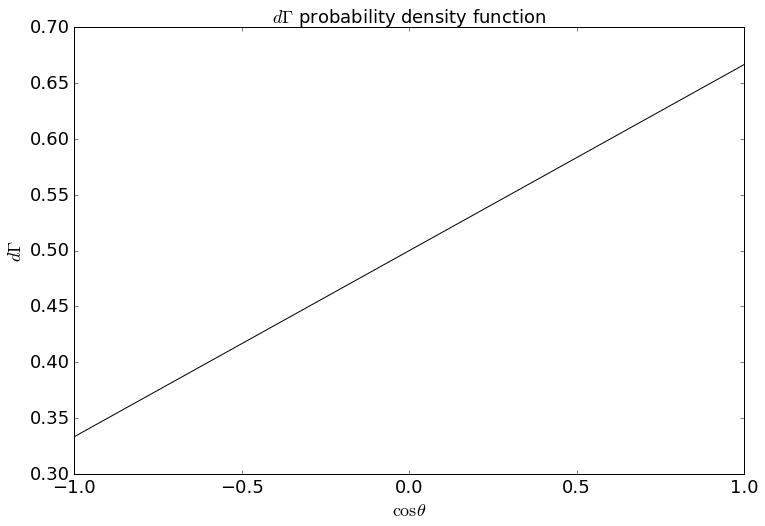

In [95]:
# Define parameters
Pmu=-1
# Define plot variables
cost=np.linspace(-1,1,201)
dG=gamma(cost,Pmu)
# Plot
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(cost,dG)
ax.set_title('$d\Gamma$ probability density function')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')

### Try-Reject p.d.f generation

In [96]:
# Montecarlo try-reject
N=10000000
Xi=np.empty(N)
i=0
#define fmax
if Pmu>0:
    fmax=gamma(-1,Pmu)
else:
    fmax=gamma(1,Pmu)

while i<N:
    r=random.random()
    x=-1+2*r
    y=random.random()*fmax
    if gamma(x,Pmu)>=y:
        Xi[i]=x
        i+=1

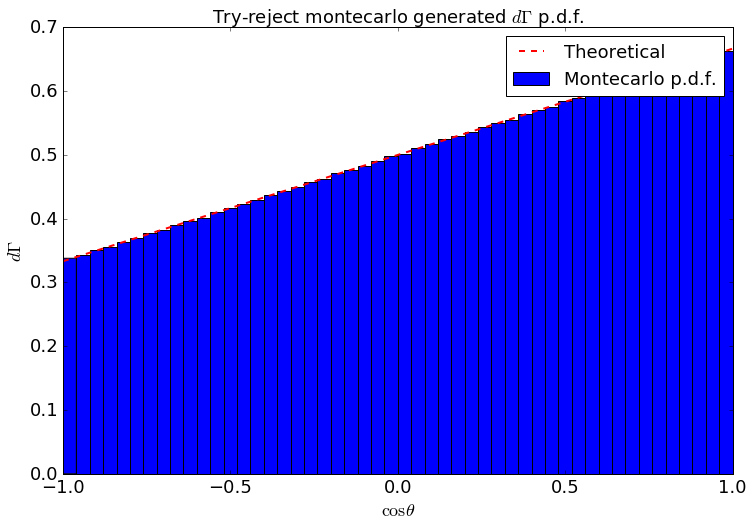

In [97]:
#Plot for the Try-reject method
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xi,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Try-reject montecarlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()

### Inverse function p.d.f. generation
In order to generate a p.d.f via the inverse method we need the inverse of the cumulative function. The cumulative function was found in the first question while checking that the p.d.f. was normalized, thus:

$$
F(\cos\theta)=\Big[\frac{1}{2}z-\frac{1}{6}P_{\mu}z^2 \Big]_{-1}^{\cos\theta}=\frac{1}{2}(\cos\theta+1)-\frac{1}{6}P_{\mu}(\cos^2\theta-1) 
$$

$$
\frac{P_{\mu}}{6}\cos^2\theta-\frac{\cos\theta}{2}+r-\frac{3+P_{\mu}}{6}=0 \quad \rightarrow \quad \cos\theta=\frac{\frac{3}{2}\pm 3\sqrt{\frac{1}{4}-\frac{2P_{\mu}}{3}(r-\frac{3+P_{\mu}}{6})}}{P_{\mu}}
$$

In [74]:
# Inverse function
def Finv(r,Pmu):
    #cost=(1.5-3.*np.sqrt(.25-2./3.*Pmu*(r-(3.+Pmu)/6.)))/Pmu
    cost=(.5-np.sqrt(.25-2.*Pmu/3*(r-.5-Pmu/6)))/(Pmu/3)
    return cost

In [75]:
# Montecarlo inverse function
N=1000000
Xinv=np.empty(N)
for i in xrange(N):
    r=random.random()
    Xinv[i]=Finv(r,Pmu)

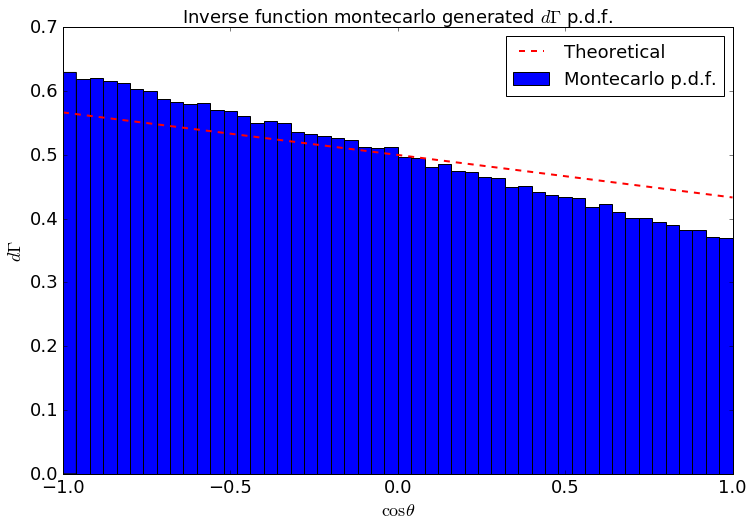

In [76]:
#Plot for the inverse function method
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xinv,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Inverse function montecarlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()

### Estimate distribution parameters
In this section, the rellevant parameters of the p.d.f. will be estimated from the montecarlo generated sample. To be able to compare this values, the theoretical values will also be obtained:

$$
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) \cos\theta d\cos\theta = \Big[\frac{\cos^2\theta}{4}-\frac{P_{\mu}}{6}\frac{\cos^3\theta}{3}\Big]_{-1}^{1}=\frac{P_{\mu}}{9}
$$

In [98]:
# Define estimator functions
def mean(Xj):
    mean=sum(Xj)/(len(Xj)+1)
    return mean
def var(Xj,mean):
    Xj=(Xj-mean)
    var=np.dot(Xj,Xj)/len(Xj)
    return var


In [99]:
mu=mean(Xi)
print mu
print var(Xi,mu)

0.111100435978
0.32102941029


In [102]:
1./9.

0.1111111111111111